In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
df = pd.read_csv('animalhealth1000.csv')

In [10]:
df

,Temperature,Pulse,Accelerometer,Latitude,Longitude,label
0,94,68,1,10.102053,76.153193,2
1,63,77,0,10.103295,76.104779,2
2,91,65,2,10.950410,76.948130,2
3,84,70,2,10.149853,76.152391,2
4,9,73,2,10.819590,76.124742,2
...,...,...,...,...,...,...
995,104,80,9,10.110597,76.118312,1
996,99,84,7,10.118920,76.101387,1
997,112,82,10,10.115908,76.113979,1
998,104,82,7,10.111140,76.105125,1


In [11]:
df.isnull().sum()

Temperature      0
Pulse            0
Accelerometer    0
Latitude         0
Longitude        0
label            0
dtype: int64

Lets visualize the data to gain some insights

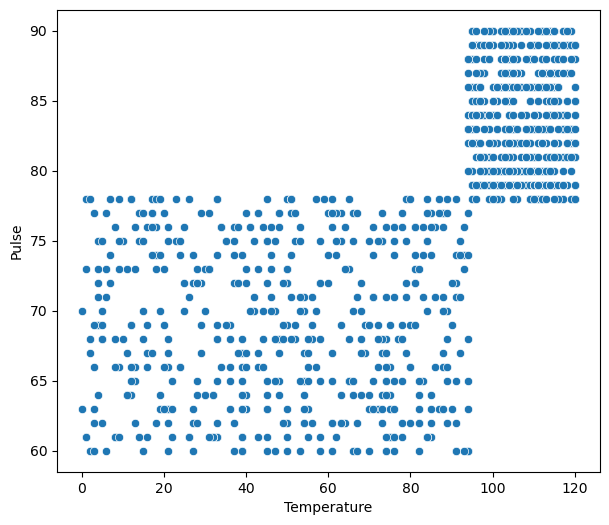

In [12]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="Temperature",y="Pulse",data=df)
plt.show()

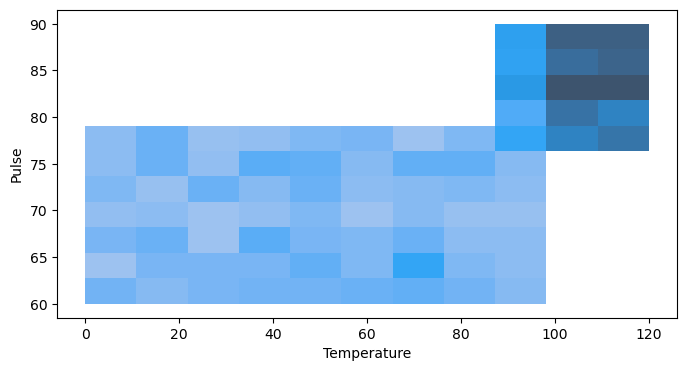

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(x="Temperature",y="Pulse",data=df)
plt.show()

Both of the above graphs tells us that when the temperature raises the pulse rate of the cattle also raises

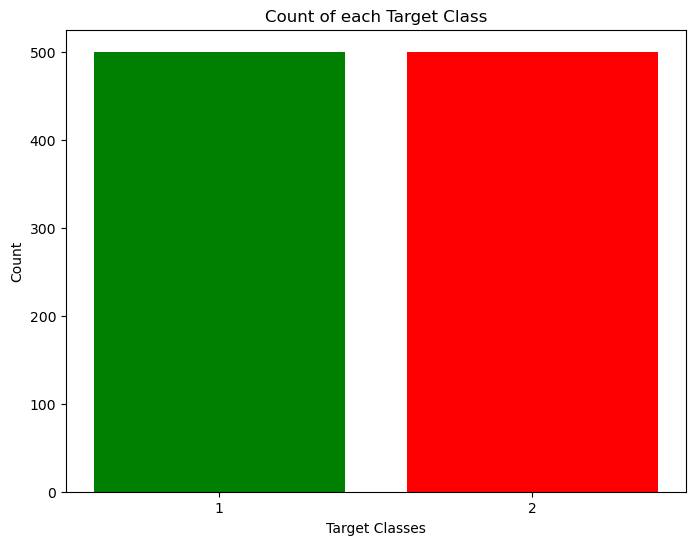

In [15]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['label'].unique(), df['label'].value_counts(), color = ['red', 'green'])
plt.xticks([2, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.show()

### Scaling data for normalization 

In [36]:
y = df['label']
X = df.drop(['label'], axis = 1)
ss = StandardScaler()
scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(scaled,columns=X.columns)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0,stratify=y)

In [18]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (800, 5)
X_test : (200, 5)
y_train : (800,)
y_test : (200,)


### Training a Gaussian NaiveBayes Classifier and Evaluating the model

In [37]:
gnb = GaussianNB()

In [38]:
gnb.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = gnb.predict(X_test)
confusionmatrix = confusion_matrix(y_test,y_pred)
confusionmatrix

array([[100,   0],
       [  0, 100]], dtype=int64)

In [22]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Testing Model with the Sensor Data

After collecting the data from sensors, it is stored in the blynk cloud and we are extracting the data from there to find wheather the model is healthy or not healthy

In [23]:
import urllib
import requests
import re

In [48]:
link = "https://blynk.cloud/external/api/get?token=qSUBh7wQMRujpFumxO4cTjEQ6sWOpojN&V1"
f = requests.get(link)
f1=f.text
f1="".join(c for c in f1 if c.isalnum())

link2 = "https://blynk.cloud/external/api/get?token=qSUBh7wQMRujpFumxO4cTjEQ6sWOpojN&V2"
f = requests.get(link2)
f2=f.text

link3 = "https://blynk.cloud/external/api/get?token=qSUBh7wQMRujpFumxO4cTjEQ6sWOpojN&V3"
f = requests.get(link3)
f3=f.text

link4 = "https://blynk.cloud/external/api/get?token=qSUBh7wQMRujpFumxO4cTjEQ6sWOpojN&V4"
f = requests.get(link4)
f4=f.text


In [49]:
print(f1)
print(f2)
def spliter(line):
    dim = ['A','H','AQ','CO','G','PIR','PRE']
    remove = ['P','T: ','D']
    for word in remove:
        line = line.replace(word,"")   
    for word in dim:
        word = ""+word+""
        line = line.replace(word," ")
    return line.split(" ")
result1 = spliter(f1)
result2 = spliter(f2)
result3 = spliter(f3)
result4 = spliter(f4)

P66A5
T: 95.79


In [50]:
print('Temperature : ',result2[0])
print('Accelerometer : ',result1[1])
print('Latitude : ', result3[0])
print('Longitude : ', result4[0])
print("Pulse value:", result1[0])

Temperature :  95.79
Accelerometer :  5
Latitude :  10.8702
Longitude :  76.9263
Pulse value: 66


In [51]:
sensordata = [[float(result2[0]),float(result1[0]),float(result1[1]),float(f3),float(f4)]]
print(sensordata)

[[95.79, 66.0, 5.0, 10.8702, 76.9263]]


In [52]:
y_pred = gnb.predict(sensordata)

In [53]:
healthy_pulse_threshold = 40
unhealthy_pulse_threshold = 100

if float(result1[0]) <= healthy_pulse_threshold or float(result1[0]) >= unhealthy_pulse_threshold:
    print('Pulse rate indicates unhealthy condition')
elif y_pred == 1:
    print('Not Healthy')
    res1 = '1'
elif y_pred == 2:
    print("Healthy")
    res1="2"


Healthy


In [ ]:
import joblib
